<a href="https://colab.research.google.com/github/GraceChen996/TensorFlowLearningNote/blob/branch1/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#神经网络结构


**神经网络被视为一个黑箱**
+ 输入层：该层接收我们需要处理的数据
+ 输出层：我们希望输出层的值在[0,1]之间，
+ 隐藏层：在使用神经网络时，该层无法被观察到
+ 权重：节点和节点的连接之间存在权重
+ 激活函数：用于保证所得到的值能处于[0,1]之间
+ 损失/代价函数：损失函数用于衡量实际输出和期望输出之间的差距
+ 梯度：最小化损失函数的方向

#Imports

In [3]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


#Dataset

该样例使用了MNIST Fashion Dataset。
该样例包括了60,000张图片来训练神经网络，10,000张图片来对神经网络进行测试

In [12]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [10]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker'
,'Bag','Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_images[0,23,23]

194

In [7]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

查看图片的样子

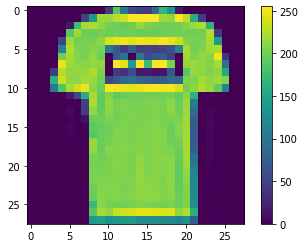

In [8]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

#数据预处理

建立模型前的最后一步就是对数据进行预处理，即在将数据提供给模型前先进行一些转换。
<br>
在该样例中，我们尝试将每个值都除以255.0，因为较小的数值更加便于计算

In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

#建立模型

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #input layer
    #dense意味着本层的任一节点都与上一层的全部节点相连接
    keras.layers.Dense(128,activation='relu'), #hidden layer
    keras.layers.Dense(10,activation='softmax') #output layer
])

#编译模型

In [18]:
model.compile(optimizer='adam', #adam是一种用于梯度下降的算法
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
      )

#训练模型

In [19]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4949 - accuracy: 0.8266
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3731 - accuracy: 0.8659
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3357 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3108 - accuracy: 0.8858
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2959 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2773 - accuracy: 0.8969
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2686 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2565 - accuracy: 0.9054
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2468 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.237

#评估模型

使用keras的工具verbose.
<br><br>
通过样例可以发现，上文中显示的测试准确性是91%左右，而使用verbose工具评估出的结果是88%左右。这是因为在上文中，出现了过拟合的情况。
<br><br>
由于神经网络是一个黑盒，我们无法直接看见过拟合问题是如何产生的，所以只能通过调整参数（迭代次数，损失函数等）来解决该问题。

In [21]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=1)
print('Test accuracy:',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3419 - accuracy: 0.8842
Test accuracy: 0.8841999769210815


#做预测

In [ ]:
predictions = model.predict(test_images)
print(predictions)

In [23]:
test_images.shape

(10000, 28, 28)

#修正预测